In [1]:
from keras import layers
from keras import models
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionV3
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras import optimizers, regularizers

Using TensorFlow backend.


In [2]:
RESOLUTION = 150
BATCH_SIZE = 20

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)

train_generator = train_datagen.flow_from_directory(
        '../input/the-simpsons-dataset/the-simpsons-dataset/top-10/',
        target_size=(RESOLUTION, RESOLUTION),
        batch_size=BATCH_SIZE,
        class_mode='categorical', subset="training")

val_generator = val_datagen.flow_from_directory(
        '../input/the-simpsons-dataset/the-simpsons-dataset/top-10/',
        target_size=(RESOLUTION, RESOLUTION),
        batch_size=BATCH_SIZE,
        class_mode='categorical', subset="validation")

Found 11745 images belonging to 10 classes.
Found 2066 images belonging to 10 classes.


In [3]:
train_generator.class_indices

{'bart_simpson': 0,
 'charles_montgomery_burns': 1,
 'homer_simpson': 2,
 'krusty_the_clown': 3,
 'lisa_simpson': 4,
 'marge_simpson': 5,
 'milhouse_van_houten': 6,
 'moe_szyslak': 7,
 'ned_flanders': 8,
 'principal_skinner': 9}

In [4]:
model = Sequential()
model.add(layers.Conv2D(filters=100, kernel_size=(5, 5), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.Conv2D(filters=100, kernel_size=(5, 5), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 146, 146, 100)     7600      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 142, 142, 100)     250100    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 71, 71, 100)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 504100)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32262464  
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 32,520,814
Trainable params: 32,520,814
Non-trainable params: 0
________________________________________________________________

In [ ]:
epoch_ = [10, 50, 100]
lr_ = [0.001, 0.01, 0.1]
history_report = []

# Epochs = 10

In [6]:
N_TRAIN = 11745
N_VAL = 2066

for l_ in lr_:
    opt = optimizers.RMSprop(lr=l_, rho=0.9, epsilon=None, decay=0.0)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit_generator(
    train_generator,
    steps_per_epoch=(N_TRAIN // BATCH_SIZE),
    epochs=epoch_[0],
    validation_data=val_generator,
    validation_steps=(N_VAL // BATCH_SIZE) 
    )

    history_report.append(history)

Epoch 1/10
587/587 [==============================] - 209s 357ms/step - loss: 14.5212 - acc: 0.0977 - val_loss: 14.5298 - val_acc: 0.0985
Epoch 2/10
587/587 [==============================] - 205s 350ms/step - loss: 14.5392 - acc: 0.0980 - val_loss: 14.5504 - val_acc: 0.0973
Epoch 3/10
587/587 [==============================] - 204s 348ms/step - loss: 14.5420 - acc: 0.0978 - val_loss: 14.4953 - val_acc: 0.1007
Epoch 4/10
587/587 [==============================] - 204s 348ms/step - loss: 14.5365 - acc: 0.0981 - val_loss: 14.5583 - val_acc: 0.0968
Epoch 5/10
587/587 [==============================] - 204s 348ms/step - loss: 14.5379 - acc: 0.0980 - val_loss: 14.5268 - val_acc: 0.0987
Epoch 6/10
587/587 [==============================] - 204s 348ms/step - loss: 14.5351 - acc: 0.0982 - val_loss: 14.5346 - val_acc: 0.0982
Epoch 7/10
587/587 [==============================] - 204s 348ms/step - loss: 14.5502 - acc: 0.0973 - val_loss: 14.5346 - val_acc: 0.0982
Epoch 8/10
587/587 [==============

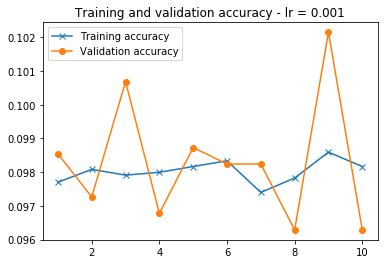

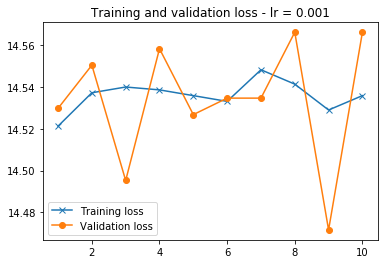

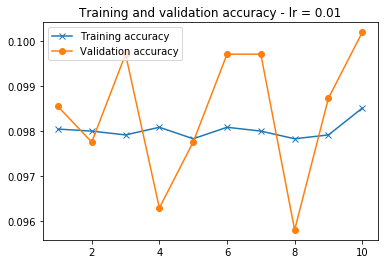

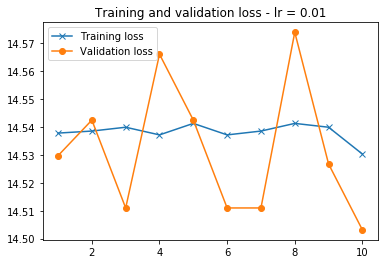

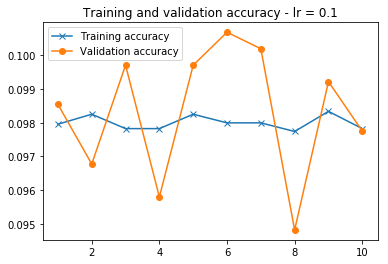

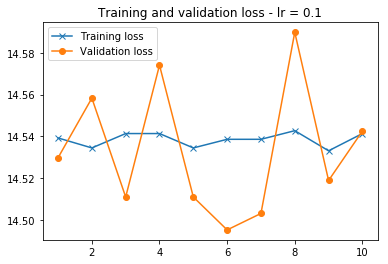

In [24]:
for history_, l_ in zip(history_report, lr_):
    acc = history_.history['acc']
    val_acc = history_.history['val_acc']
    loss = history_.history['loss']
    val_loss = history_.history['val_loss']
    epochs = range(1, len(acc) + 1)
    
    plt.plot(epochs, acc, label='Training accuracy', marker='x')
    plt.plot(epochs, val_acc, label='Validation accuracy', marker='o')
    plt.title('Training and validation accuracy - lr = {}'.format(l_))
    plt.legend()
    plt.figure()
    
    plt.plot(epochs, loss, label='Training loss', marker='x')
    plt.plot(epochs, val_loss, label='Validation loss', marker='o')
    plt.title('Training and validation loss - lr = {}'.format(l_))
    plt.legend()
    
    plt.show()

# Epochs = 50

In [ ]:
N_TRAIN = 11745
N_VAL = 2066

for l_ in lr_:
    opt = optimizers.RMSprop(lr=l_, rho=0.9, epsilon=None, decay=0.0)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit_generator(
    train_generator,
    steps_per_epoch=(N_TRAIN // BATCH_SIZE),
    epochs=epoch_[1],
    validation_data=val_generator,
    validation_steps=(N_VAL // BATCH_SIZE) 
    )

    history_report.append(history)